In [1]:
#From:
#   http://stackoverflow.com/questions/37144423/all-possible-maximum-matchings-of-a-bipartite-graph

import networkx as nx
import matplotlib.pyplot as plt

def checkAll(G,m):
    b = nx.bipartite.eppstein_matching(G) # Finds first match
    c = list(b.keys())
    for y in c[int(len(c)/2):]: # Reduces to one occurrence per line
        b.pop(y)
    if len(b) != m: # If new size, break
        return 0
    return b # Add to list of possibilities

def maximal_matching(G):
    edges = G.edges()
    A = []
    m = len(nx.bipartite.eppstein_matching(G))/2 # Create an expected maximum
    for x in range(len(edges)):
        b = checkAll(G,m)
        if b:
            A += [b]
        else:
            break
        keys = list(b.keys())
        cache = (keys[0],b[keys[0]])
        removed = []
        while 1:
            removed += [(keys[1],b[keys[1]])]
            G.remove_edge(keys[1],b[keys[1]]) # Remove first option
            b = checkAll(G,m)
            if b and cache == (keys[0],b[keys[0]]):
                A += [b]
            else:
                break
        G.add_edges_from(removed)
        G.remove_edge(*edges[x])

    return A

def print_matching(A):
    print(list(eval(x) for x in set(str(x) for x in A)))

C:\Users\Daniel\Anaconda3\envs\py3k\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Daniel\Anaconda3\envs\py3k\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Daniel\Anaconda3\envs\py3k\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Daniel\Anaconda3\envs\py3k\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn(

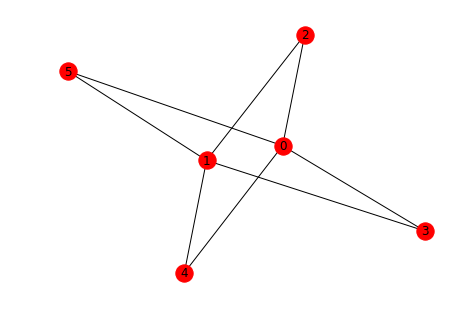

[{0: 5, 1: 3}, {0: 3, 1: 2}, {0: 4, 1: 3}, {0: 5, 1: 4}, {0: 2, 1: 5}, {0: 5, 1: 2}, {0: 4, 1: 5}, {0: 3, 1: 5}, {0: 2, 1: 4}, {0: 3, 1: 4}, {0: 4, 1: 2}, {0: 2, 1: 3}]


In [2]:
G = nx.complete_bipartite_graph(2, 4)
nx.draw(G, with_labels=True)
plt.show()

max_list = maximal_matching(G)
print_matching(max_list)

In [2]:
import sys
print(sys.version)
!python -V

3.5.2 |Anaconda 4.3.1 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


Python 3.5.2 :: Anaconda 4.3.1 (64-bit)


C:\Users\Daniel\Anaconda3\envs\py35\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Daniel\Anaconda3\envs\py35\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Daniel\Anaconda3\envs\py35\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Daniel\Anaconda3\envs\py35\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn(

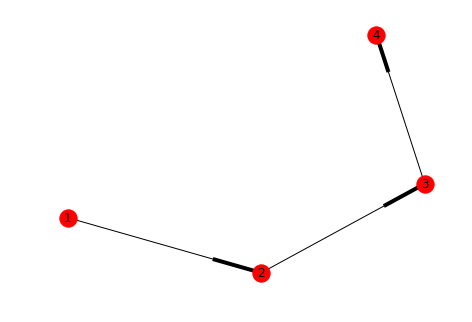

Test network # 1
[]


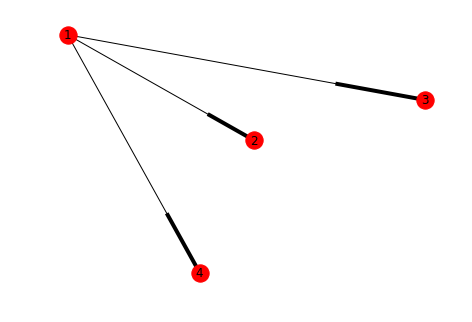

Test network # 2
[]


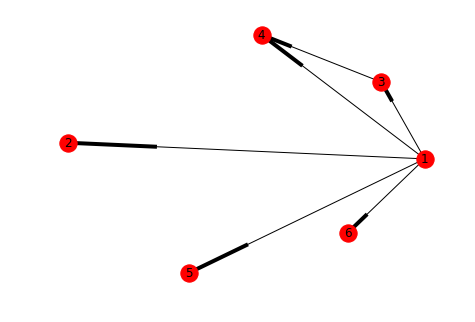

Test network # 3


IndexError: list index out of range

In [3]:
## Test the algorithm on Liu's example networks:
import LiuTestNetworks as LTN
import networkx as nx
import matplotlib.pyplot as plt

for n in range(1,4):
    G = LTN.testNet(n)
    nx.draw(G, with_labels=True)
    plt.show()
    print('Test network #', n)
    max_list = maximal_matching(G)
    print_matching(max_list)